## Вводная часть

<a id='1-topoc'></a>

### Описание проекта

Проект проводится для фермера, владельца молочного хозяйства «Вольный луг». Заказчик хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом клиенту нужно выполнять свой план развития молочного хозяйства.
Поступил заказ на разработку модели машинного обучения, которая поможет заказчику управлять рисками и принимать объективное решение о покупке. 

____ 

### Цель исследования

С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

____ 

### Задачи исследования

Необходимо построить две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

____ 

### Исходные данные

Для проведения исследования было получено три датасета содержащих следующую информацию:

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 

Описание данных:

- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
- Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
- Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. 

Описание данных:

- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.


Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

Описание данных:

- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
- Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. 

Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

____ 

### Ход исследования

1) [Вводная часть](#1-topoc)

2) [Загрузка данных](#2-topoc)

3) [Предобработка данных](#3-topoc)

4) [Исследовательский анализ](#4-topoc)

5) [Корреляционный анализ](#5-topoc)

6) [Обучение модели линейной регрессии](#6-topoc)

7) [Обучение модели логистической регрессии](#7-topoc)

8) [Итоговые выводы](#8-topoc)

<a id='2-topoc'></a>
## Загрузка данных

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mp
import scipy.stats as st 

In [40]:
from scipy import stats as st
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

RANDOM_STATE = 42

sb.set(style = 'whitegrid')
sb.set(rc={'figure.figsize':(16,9)})
sb.set_context('paper', rc={'font.size': 10,
                             'axes.titlesize': 10,
                             'xtrick.labelsize': 'small',
                             'ytrick.labelsize': 'small',
                             'legend.fontsize': 'small',
                             'legend.title_fontsize':10})

In [6]:
fm = pd.read_csv('/datasets/ferma_main.csv', sep=';')
fd = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cb = pd.read_csv('/datasets/cow_buy.csv', sep=';')

### Первичное изучение

In [7]:
display(fm.head(5))
fm.info()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Наблюдаются ошибки с типом данных в датасете, пропусков не обнаружено

In [8]:
display(fd.head(5))
fd.info()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Ошибок с типом данных не обранужено, пропусков не обнаружено

In [9]:
display(cb.head(5))
cb.info()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Наблюдаются ошибки с типом данных в датасете, пропусков не обнаружено

### Вывод

Для проведения исследования предоставлены три датасета. Столбцы обозначены кириллицей, для удобства написания кода переведем на английский на этапе предобработки.
- В первом ( поголовье фермера ) 634 строки и 12 столбцов, наблюдаются проблемы с типами данных, пропусков не обнаружено. 
- Во втором ( доп. инф. к первому) 629 строк и 2 колонки, первичных проблем с данными не обнаружено
- В третьем ( поголовье не покупку ) 20 строк 7 столбцов, наблюдаются проблемы с типами данных, пропусков не обнаружено.

Выходит для покупки у нас есть всего 20 коров на выбор ( если нет дубликатов, это будет рассмотрено ниже )

<a id='3-topoc'></a>
##  Предобработка данных

### Упорядочивание названий столбцов

Для удобства написания кода переведем название всех столбцов на английский язык

In [10]:
fm = fm.rename(columns = {'Удой, кг':'profit', 
                        'ЭКЕ (Энергетическая кормовая единица)':'feed_en', 
                        'Сырой протеин, г':'feed_pr', 
                        'СПО (Сахаро-протеиновое соотношение)':'feed_sh', 
                        'Порода': 'breed',
                        'Тип пастбища':'ar_type',
                        'порода папы_быка':'dad_breed',
                        'Жирность,%':'fatness',
                        'Белок,%':'protein',
                        'Вкус молока':'milck_taste',
                        'Возраст':'more_then_two_years'
                       })


fm.head(5)

,id,profit,feed_en,feed_pr,feed_sh,breed,ar_type,dad_breed,fatness,protein,milck_taste,more_then_two_years
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [11]:
fd = fd.rename(columns = {'Имя Папы':'dad_name'})
fd.head(5)

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [12]:
cb = cb.rename(columns = {'Порода':'breed', 
                        'Тип пастбища':'ar_type', 
                        'порода папы_быка':'dad_breed', 
                        'Имя_папы':'dad_name', 
                        'Текущая_жирность,%': 'fatness',
                        'Текущий_уровень_белок,%':'protein',
                        'Возраст':'more_then_two_years'
                       })


cb.head(5)

,breed,ar_type,dad_breed,dad_name,fatness,protein,more_then_two_years
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### Упорядочивание типов данных

#### Датаcет 1

In [13]:
print(fm['milck_taste'].unique())
print(fm['more_then_two_years'].unique())

['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


Показатели: ЭКЕ, СПО, Жирность и Белок - дробные, поправим типы данных. Округлять не будем чтобы не потерять подробности способные повлиять на выводы. Возраст и Вкус молока принимают только два значения - переведем показатель в тип bool, где показатели будут - "более_2_лет" - True; "менее_2_лет" - False; "Вкусно" - True; "Не вкусно" - False соответственно.

In [14]:
fm['fatness'] = fm['fatness'].replace(",", ".", regex=True)
fm['protein'] = fm['protein'].replace(",", ".", regex=True)
fm['feed_sh'] = fm['feed_sh'].replace(",", ".", regex=True)
fm['feed_en'] = fm['feed_en'].replace(",", ".", regex=True)
fm = fm.astype({'fatness': 'float'})
fm = fm.astype({'protein': 'float'})
fm = fm.astype({'feed_sh': 'float'})
fm = fm.astype({'feed_en': 'float'})


In [15]:
# fm.loc[fm['milck_taste'] == 'вкусно', 'milck_taste' ] = 1
# fm.loc[fm['milck_taste'] == 'не вкусно', 'milck_taste' ] = 0
# fm['milck_taste'] = fm['milck_taste'].astype('bool')

# fm.loc[fm['more_then_two_years'] == 'более_2_лет', 'more_then_two_years' ] = 1
# fm.loc[fm['more_then_two_years'] == 'менее_2_лет', 'more_then_two_years' ] = 0
# fm['more_then_two_years'] = fm['more_then_two_years'].astype('bool')

# fm.info()

In [16]:
le = LabelEncoder()
fm['milck_taste'] = le.fit_transform(fm['milck_taste'])
fm['milck_taste'] = 1 - fm['milck_taste']

fm['more_then_two_years'] = le.fit_transform(fm['more_then_two_years']).astype('bool')
fm['more_then_two_years'] = 1 - fm['more_then_two_years'].astype('bool')

#### Датаcет 3

In [17]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   breed                20 non-null     object
 1   ar_type              20 non-null     object
 2   dad_breed            20 non-null     object
 3   dad_name             20 non-null     object
 4   fatness              20 non-null     object
 5   protein              20 non-null     object
 6   more_then_two_years  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [18]:
cb['fatness'] = cb['fatness'].replace(",", ".", regex=True)
cb['protein'] = cb['protein'].replace(",", ".", regex=True)
cb = cb.astype({'fatness': 'float'})
cb = cb.astype({'protein': 'float'})

In [19]:
cb['more_then_two_years'] = le.fit_transform(cb['more_then_two_years'])
cb['more_then_two_years'] = 1 - cb['more_then_two_years']

### Обработка дубликатов

#### Проверка на полные дубликаты

In [20]:
fm.duplicated().sum()

5

In [21]:
fd.duplicated().sum()

0

In [22]:
cb.duplicated().sum()

4

В превом датасете обнаружено 5 полных дубликатов по строкам. Во втором датасете дубликатов не обнаружено. В третьем датасете обнаружено 4 полных дубликата из 20 строк. Дубликаты из тестовой выборки не подлежат удалению, поэтому продолжаем исследование с тем что есть.

#### Устранение неявных дубликатов

In [23]:
fm['breed'].unique()
fm['ar_type'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [24]:
fm['ar_type'] = fm['ar_type'].replace(to_replace = 'Равнинные', value = 'Равнинное')
fm['ar_type'].unique()
fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   profit               634 non-null    int64  
 2   feed_en              634 non-null    float64
 3   feed_pr              634 non-null    int64  
 4   feed_sh              634 non-null    float64
 5   breed                634 non-null    object 
 6   ar_type              634 non-null    object 
 7   dad_breed            634 non-null    object 
 8   fatness              634 non-null    float64
 9   protein              634 non-null    float64
 10  milck_taste          634 non-null    int64  
 11  more_then_two_years  634 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 59.6+ KB


In [25]:
cb['ar_type'] = cb['ar_type'].replace(to_replace = 'равнинное', value = 'Равнинное')
cb['ar_type'] = cb['ar_type'].replace(to_replace = 'холмистое', value = 'Холмистое')
cb['ar_type'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

Этот параметр и параметр породы принимают только два значения, поэтому закодируем их в 0 и 1

In [26]:
fm['ar_type'] = le.fit_transform(fm['ar_type'])
cb['ar_type'] = le.transform(cb['ar_type'])

fm['breed'] = le.fit_transform(fm['breed'])
cb['breed'] = le.transform(cb['breed'])

### Обработка выбросов

#### Датасет 1

Проведем проверку на выбросы в исходных данных.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'profit'}>,
        <AxesSubplot:title={'center':'feed_en'}>],
       [<AxesSubplot:title={'center':'feed_pr'}>,
        <AxesSubplot:title={'center':'feed_sh'}>,
        <AxesSubplot:title={'center':'breed'}>],
       [<AxesSubplot:title={'center':'ar_type'}>,
        <AxesSubplot:title={'center':'fatness'}>,
        <AxesSubplot:title={'center':'protein'}>],
       [<AxesSubplot:title={'center':'milck_taste'}>,
        <AxesSubplot:title={'center':'more_then_two_years'}>,
        <AxesSubplot:>]], dtype=object)

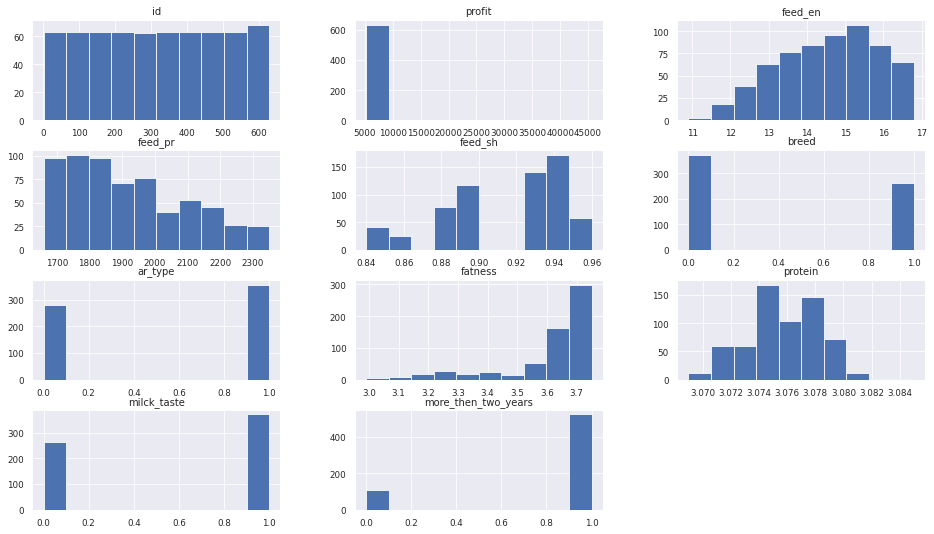

In [36]:
fm.hist()

Text(0.5, 1.0, 'Распределение показателя "Удой"')

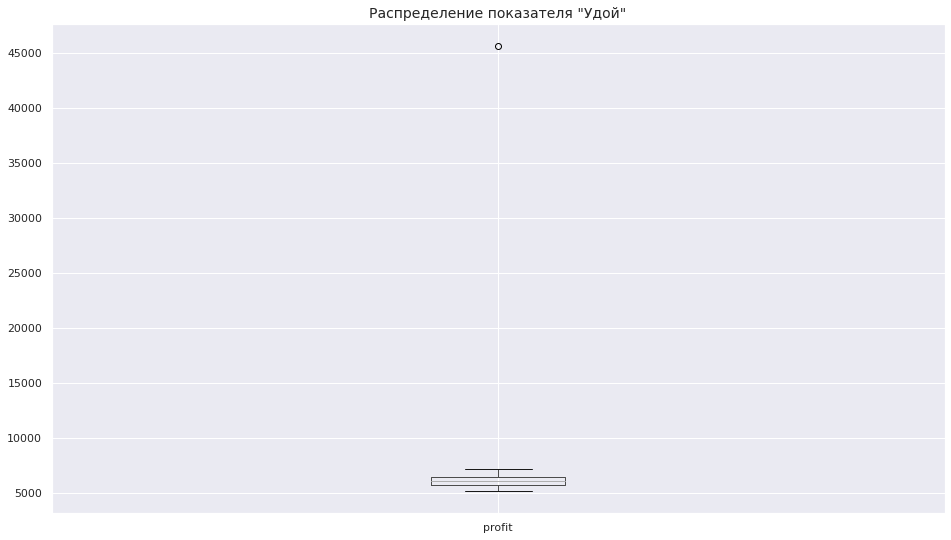

In [82]:
fm_bp = fm.boxplot(column = ['profit'])
fm_bp.set_title('Распределение показателя "Удой"',fontsize = 14)

Text(0.5, 1.0, 'Распределение показателя "Жирность"')

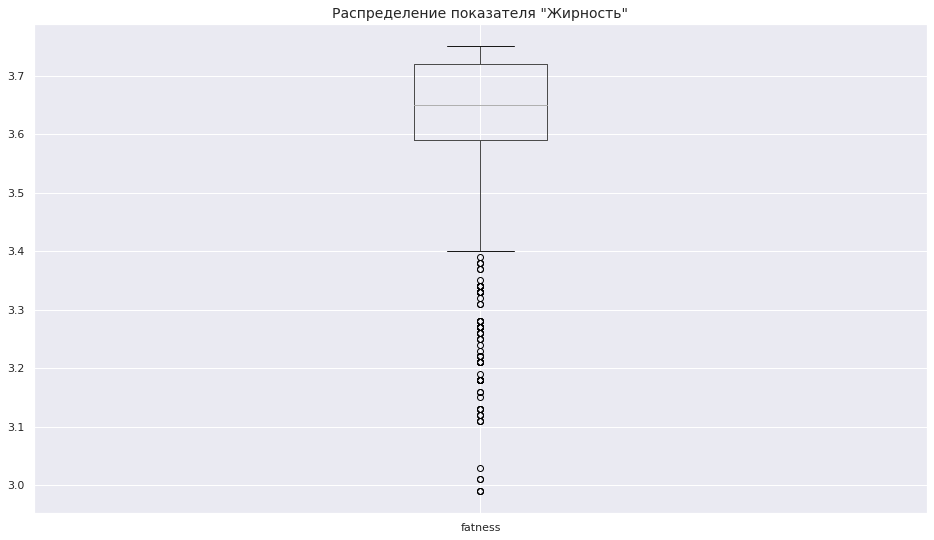

In [83]:
fm_bp = fm.boxplot(column = ['fatness'])
fm_bp.set_title('Распределение показателя "Жирность"',fontsize = 14)

Text(0.5, 1.0, 'Распределение показателя "Белки"')

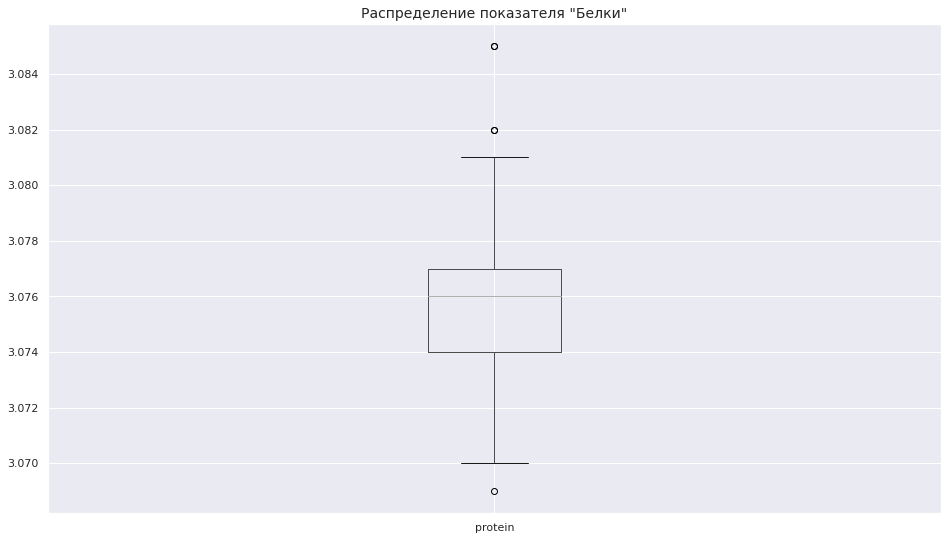

In [84]:
fm_bp = fm.boxplot(column = ['protein'])
fm_bp.set_title('Распределение показателя "Белки"',fontsize = 14)

По анализу распределения значений было обнаружено, что в показателях "Удой" и "Количество белка" имеетются возможные выбросы. По показателю "Удой" значение в 45000 кг в месяц очень сильно преувеличено, это явный выброс. По показателю "Количество белка" не обладая специфическими знаниями о данной сфере, примем значения как отклонение от нормы.

In [85]:
# замена выбросов медианами
fm.loc[fm['profit'] > 10000,'profit'] = fm['profit'].median()

In [86]:
# подсчет процента выбросов в жирности
count_v = fm.loc[fm['fatness'] < 3.4,'fatness'].count()
print(count_v / fm['fatness'].count() * 100)

13.722397476340694


Выбросы в жирности составляют почти 14% от всех данных, объем внушительный. К тому же жирность действительно может быть и 3% и даже несколько меньше. Оставим эти данные и посмотрикм как они повлияют на дальнейшее исследование, возможно это очень ценная информация. 

Далее посмотрим как распределяются данные на гистораммах

#### Датасет 3

Text(0.5, 1.0, 'Распределение показателей у заводчика')

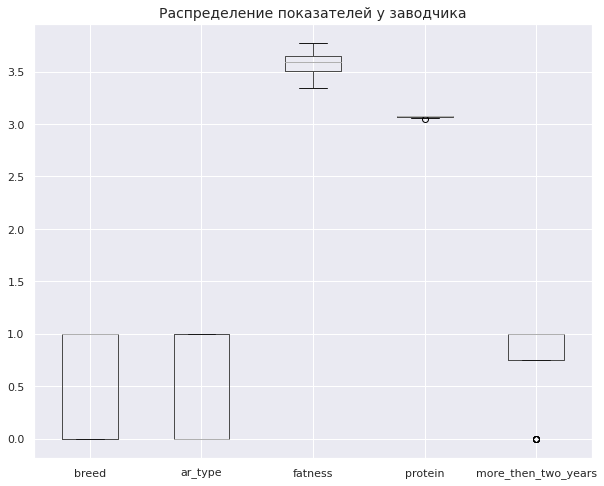

In [87]:
fm_bp = cb.boxplot(figsize = (10,8))
fm_bp.set_title('Распределение показателей у заводчика',fontsize = 14)

### Вывод

В процессе предобработки данных были заменены названия столбцов, для удобства дальнейшего исследования данных. Пропусков обнаружено небыло, были преобразованы типы данных в 1-ом и 3-ем датасетах. Также было обнаружено пять дубликатов в 1-ом датасете и один дубликат в 3-ем, дубликаты удалять из данных выборок не стали. При анилизе выбросов в 1-ом датасете были обнаружены анамалии в показателях "Удой", "Белок" и "Жирность". В первом значении - заменили медианами, остальные оставили. Также были обнаружены и исправлены неявные дубликаты категориальных признаков.

<a id='4-topoc'></a>
## Исследовательский анализ данных

### Анализ распределения показателя "Удой"

6130.25

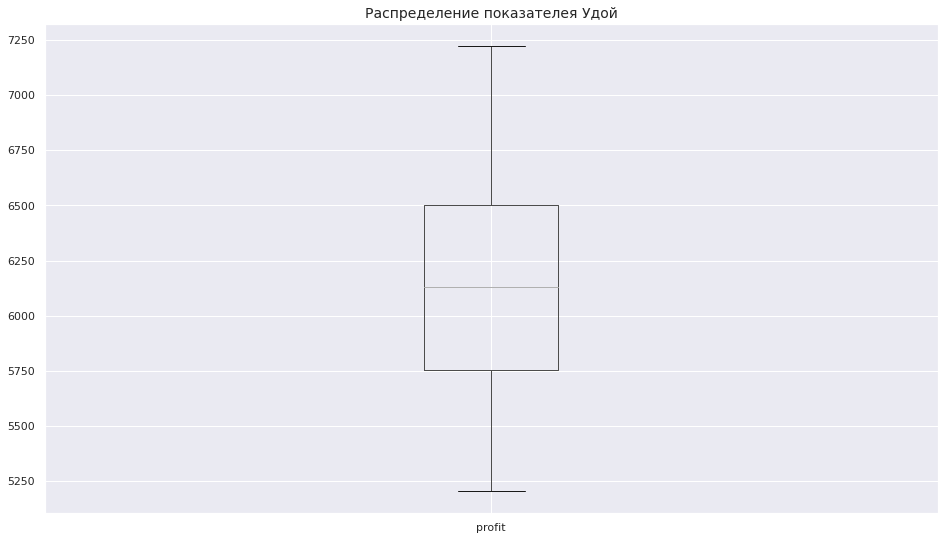

In [88]:
fm_bp = fm.boxplot(column = ['profit'])
fm_bp.set_title('Распределение показателея Удой',fontsize = 14)
fm['profit'].median()

Text(0, 0.5, 'Кол-во значений')

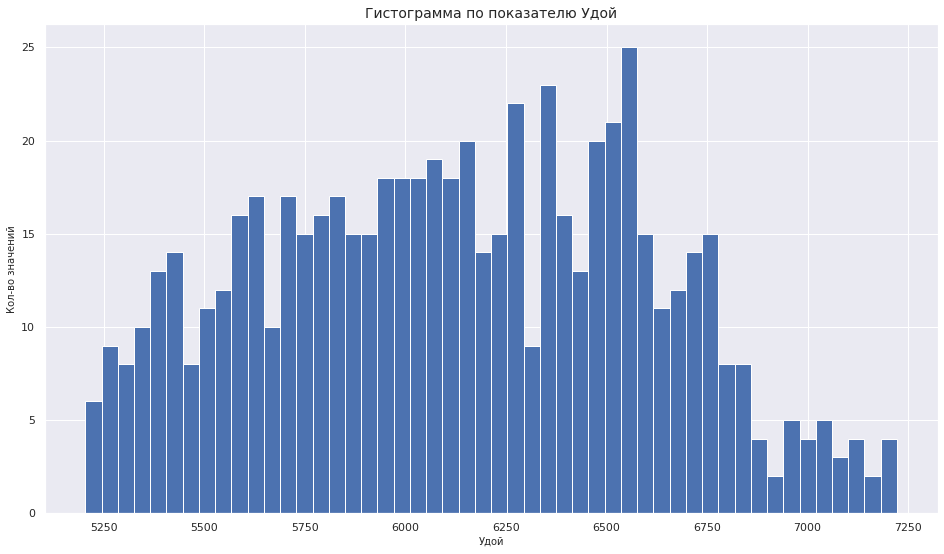

In [89]:
fm_bp = fm['profit'].hist(bins = 50)
fm_bp.set_title('Гистограмма по показателю Удой',fontsize = 14)
fm_bp.set_xlabel('Удой',fontsize = 10)
fm_bp.set_ylabel('Кол-во значений',fontsize = 10)

In [90]:
fm['profit'].median()

6130.25

По распределению показателя "Удой" можно видеть, что медианным значением является 6133 кл. Перед проектом стоит задача определить коров, которые дают более 6000 кг молока и изходя из значений выше - задача реальная.

### Анализ распределения показателя "Жирность молока"

Text(0.5, 1.0, 'Распределение показателя Жирность')

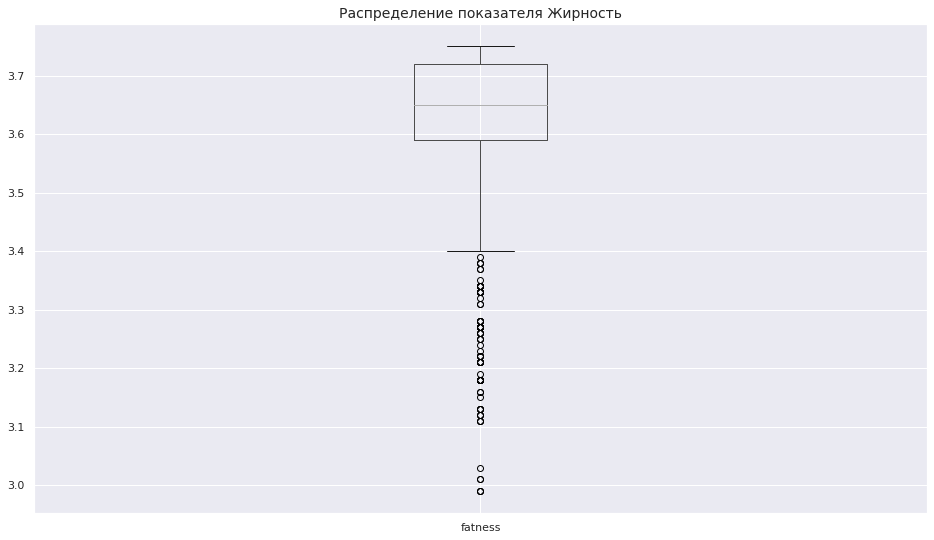

In [91]:
fm_bp = fm.boxplot(column = ['fatness'])
fm_bp.set_title('Распределение показателя Жирность',fontsize = 14)

Text(0, 0.5, 'Кол-во значений')

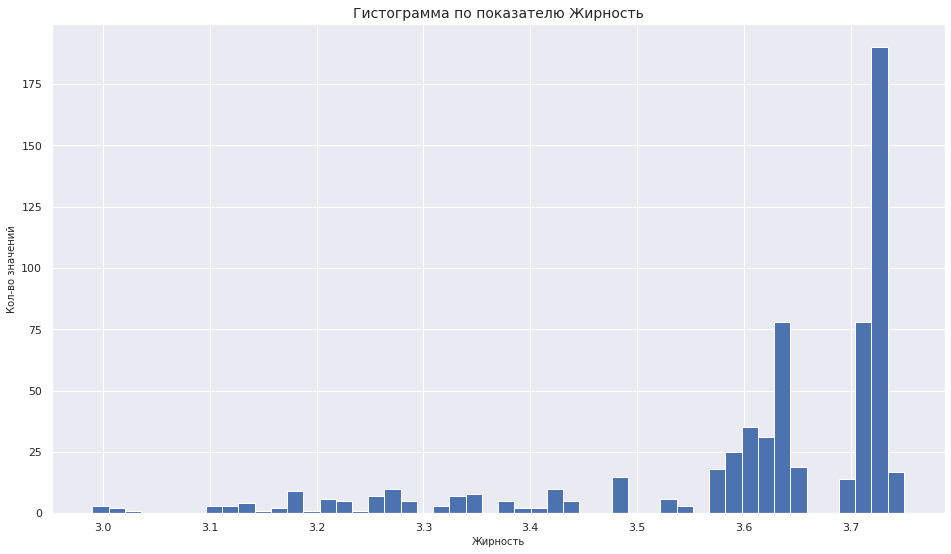

In [92]:
fm_bp = fm['fatness'].hist(bins = 50)
fm_bp.set_title('Гистограмма по показателю Жирность',fontsize = 14)
fm_bp.set_xlabel('Жирность',fontsize = 10)
fm_bp.set_ylabel('Кол-во значений',fontsize = 10)

In [93]:
fm['fatness'].median()

3.65

По распределению показателя "Жирность молока" можно видеть, что медианным значением является 3.65%. Распределение имеет длинный хвост в сторону малых значений, но ранее было принято решеение не рассматривать эти значения как выбросы и оценить их влияние на другие показатели.

### Анализ распределения показателя "Процент белка в молоке"

Text(0.5, 1.0, 'Распределение показателя Белки')

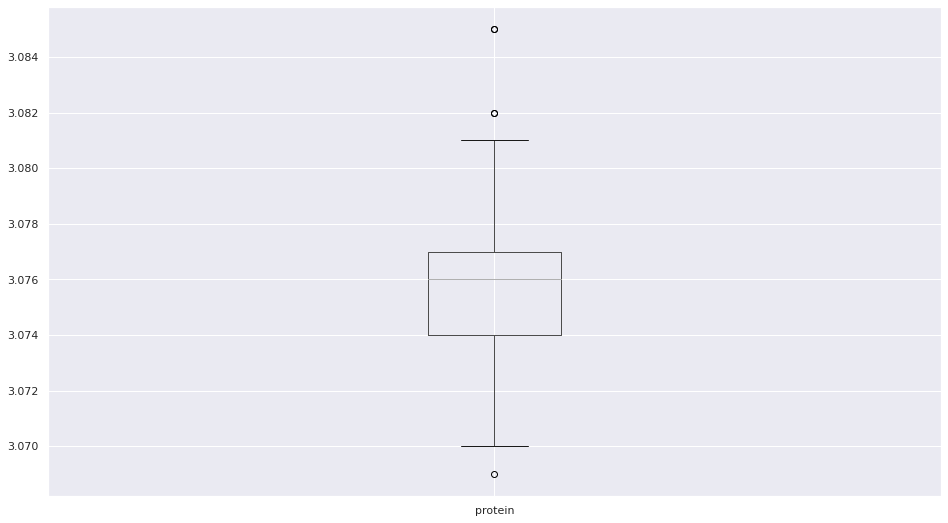

In [94]:
fm.boxplot(column = ['protein'])
fm_bp.set_title('Распределение показателя Белки',fontsize = 14)

Text(0, 0.5, 'Кол-во значений')

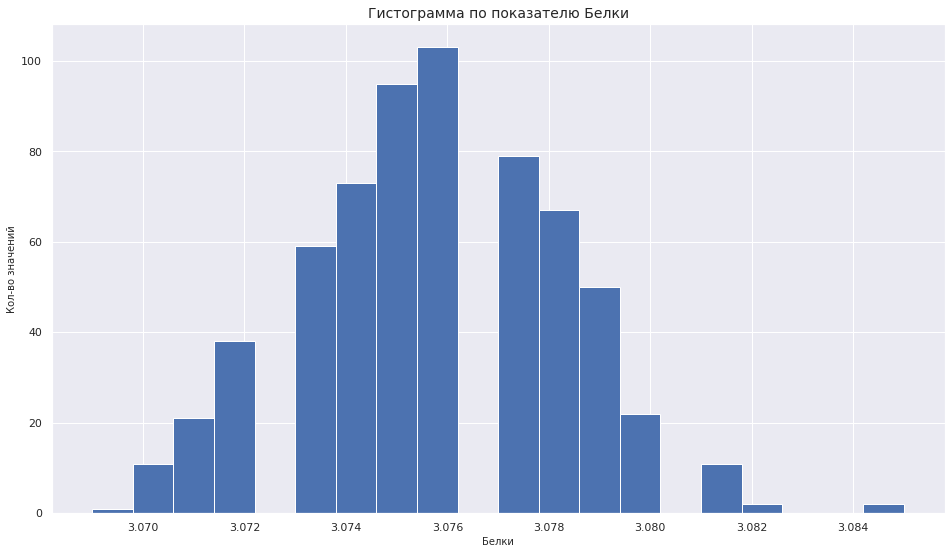

In [95]:
fm_bp = fm['protein'].plot.hist(bins = 20)
fm_bp.set_title('Гистограмма по показателю Белки',fontsize = 14)
fm_bp.set_xlabel('Белки',fontsize = 10)
fm_bp.set_ylabel('Кол-во значений',fontsize = 10)

In [96]:
fm['protein'].median()

3.076

По распределению показателя "Процент белка в молоке" можно видеть, что медианным значением является 3.076. 

### Анализ категориальных показателей

В предоставленной информации есть категориальне показатели - это порода и пастбища, рассмотрим количество уникальных значений

In [97]:
fm['breed'].unique()

array([0, 1])

In [98]:
fm['ar_type'].unique()

array([0, 1])

По категориальным показателям представлено только две опции, это достаточно удобно для анализа. Далее в корреляционном анализе оценим влияние этих категорий на другие показатели.

### Вывод

В результате проведенного исследовательского анализа данных удалось высяснить следующее:

- Явная бимодальность в данных. Т.е. надо углублять в анализы подгрупп, прежде чем делать какие-то выводы.
- По распределению показателя "Удой" можно видеть, что медианным значением является 6133 кл. Перед проектом стоит задача определить коров, которые дают более 6000 кг молока и изходя из значений выше - задача реальная.
- По распределению показателя "Жирность молока" можно видеть, что медианным значением является 3.65%. Распределение имеет длинный хвост в сторону малых значений, но ранее было принято решеение не рассматривать эти значения как выбросы и оценить их влияние на другие показатели.
- По распределению показателя "Процент белка в молоке" можно видеть, что медианным значением является 3.076. Распределение близится к нормальному.
- По категориальным показателям представлено только две опции, это достаточно удобно для анализа. Далее в корреляционном анализе оценим влияние этих категорий на другие показатели.

<a id='5-topoc'></a>
## Корреляционный анализ

### Общий анализ корреляции показателей

Для выявления закономерностей посмотрим на тепловую карту корреляции признаков.

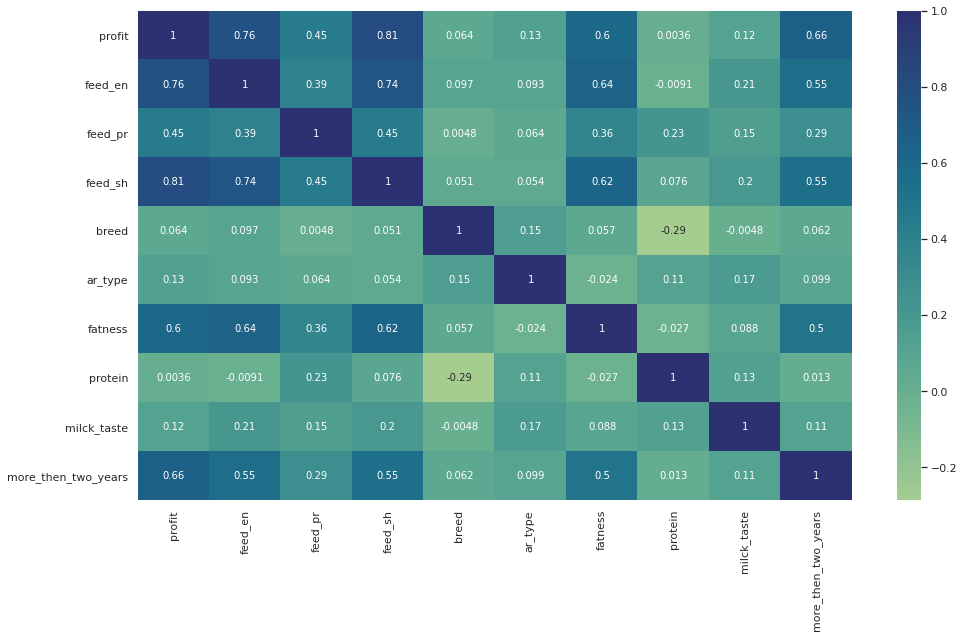

In [99]:
corr_map = fm.drop(['id'], axis = 1)
corr_map = sb.heatmap(corr_map.corr(), annot=True, cmap="crest")


Text(119.59375, 0.5, 'Параметры')

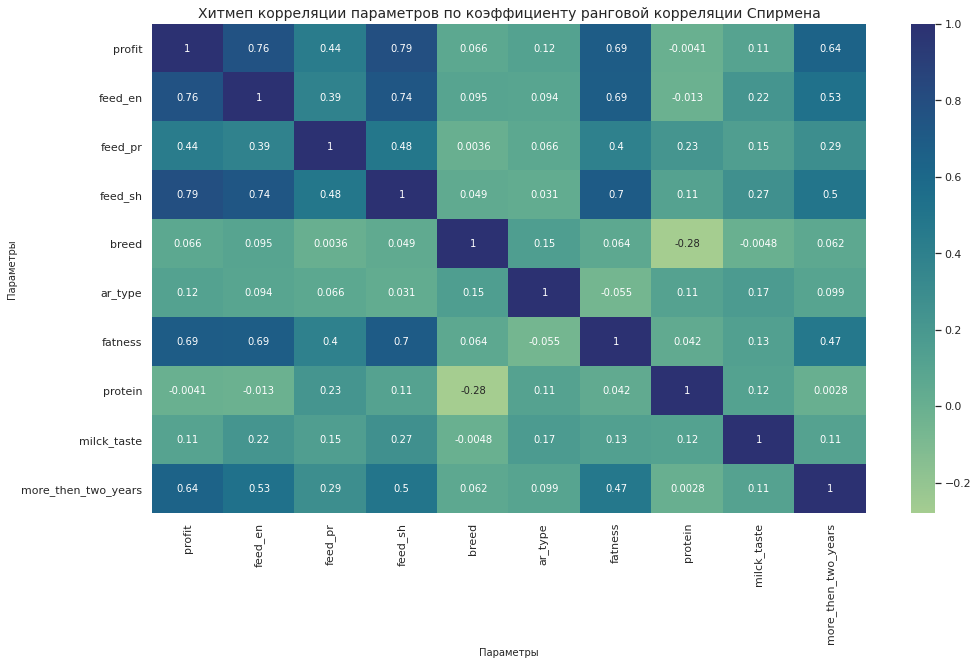

In [100]:
corr_map = fm.drop(['id'], axis = 1)
corr_map = sb.heatmap(corr_map.corr(method = 'spearman'), annot=True, cmap="crest")
corr_map.set_title('Хитмеп корреляции параметров по коэффициенту ранговой корреляции Спирмена',fontsize = 14)
corr_map.set_xlabel('Параметры',fontsize = 10)
corr_map.set_ylabel('Параметры',fontsize = 10)

По тепловой карте можно сделать следующие выводы:

- Между показателями "отношения сахара к протеину" и питательностью есть сильная линейная взаимосвязь.
- Эта связь может в дальнейшем исказить работу модели, ее нужно проработать. 
- Также наблюдается линейная взаимосвязь между жирностью молока и питательностью корма, далее рассмотрим это влияние подробней.
- Есть подозрение на нелинейность связи удоя с: спо, жирностью, эке
- Влияние категориальных признаков и булевых значений на показатели нельзя оценить по коэффициенту корреляции Пирсона, их тоже рассмотрим подробней. 
- Очень высоких корреляций (0.9 +) не видно, значит скорее всего мультиколлинеарности нет.

In [101]:
#plt.hotplot(fm['profit'])
#plt.hexbin(fm['profit'], fm['feed_sh'], gridsize=10)

### Матрица диаграм рассеяния

array([[<AxesSubplot:xlabel='profit', ylabel='profit'>,
        <AxesSubplot:xlabel='feed_en', ylabel='profit'>,
        <AxesSubplot:xlabel='feed_pr', ylabel='profit'>,
        <AxesSubplot:xlabel='feed_sh', ylabel='profit'>,
        <AxesSubplot:xlabel='breed', ylabel='profit'>,
        <AxesSubplot:xlabel='ar_type', ylabel='profit'>,
        <AxesSubplot:xlabel='fatness', ylabel='profit'>,
        <AxesSubplot:xlabel='protein', ylabel='profit'>],
       [<AxesSubplot:xlabel='profit', ylabel='feed_en'>,
        <AxesSubplot:xlabel='feed_en', ylabel='feed_en'>,
        <AxesSubplot:xlabel='feed_pr', ylabel='feed_en'>,
        <AxesSubplot:xlabel='feed_sh', ylabel='feed_en'>,
        <AxesSubplot:xlabel='breed', ylabel='feed_en'>,
        <AxesSubplot:xlabel='ar_type', ylabel='feed_en'>,
        <AxesSubplot:xlabel='fatness', ylabel='feed_en'>,
        <AxesSubplot:xlabel='protein', ylabel='feed_en'>],
       [<AxesSubplot:xlabel='profit', ylabel='feed_pr'>,
        <AxesSubplot:xlabel

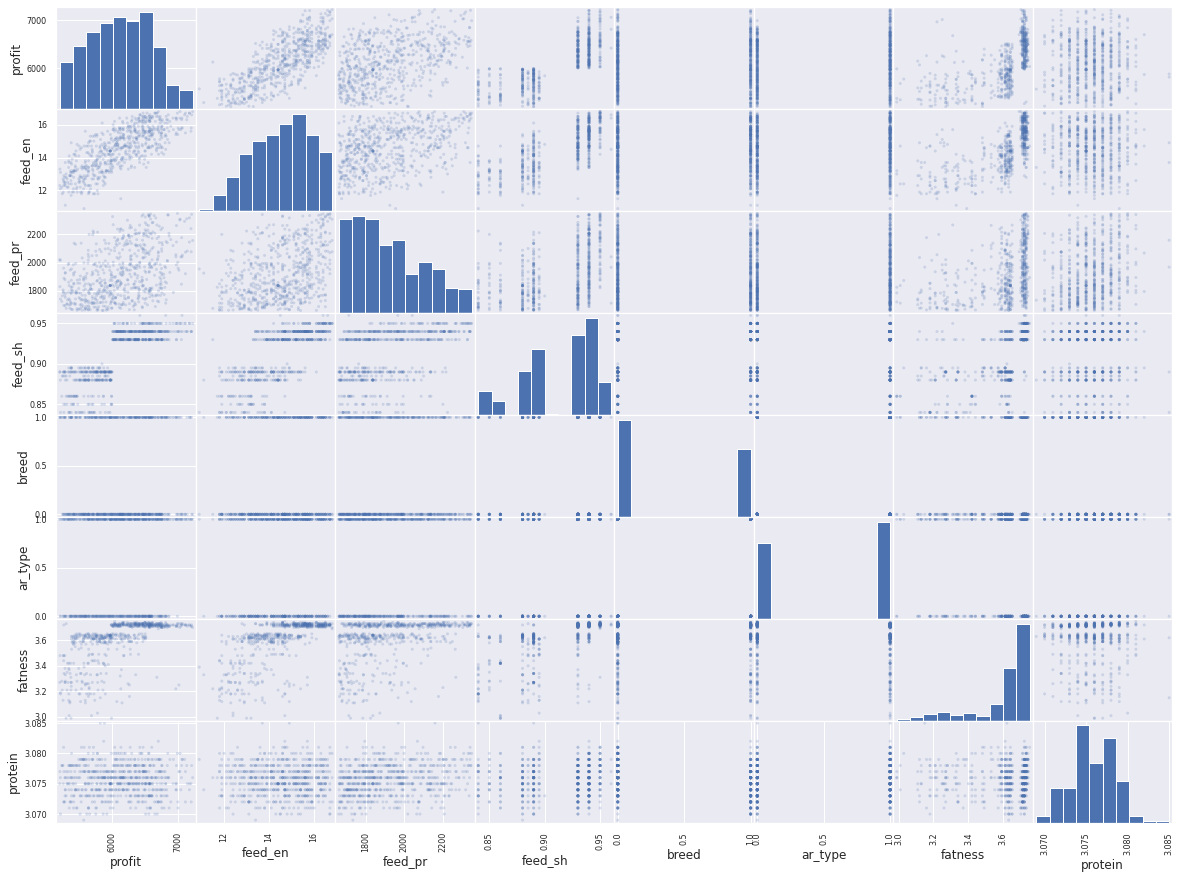

In [102]:
fm_sk = fm.drop(['milck_taste','more_then_two_years','id'], axis = 1)
pd.plotting.scatter_matrix(fm_sk, alpha=0.2, figsize = (20,15))

По матрице диаграм рассеяния также видна мультиколлинеарность сахара и питательности и зависимости обнаруженные ранее. У целевого показателя "Удой" наблюдается взаимосвязь со всеми вводными, значит модель можно обучать на этих данных.

### Влияние породы коров на вкус молока

Возможно, вкус молока у одной породы лучше, чем у другой. Построим диаграмму для определения вкусного молока у разных пород.

Text(0, 0.5, 'Кол-во значений')

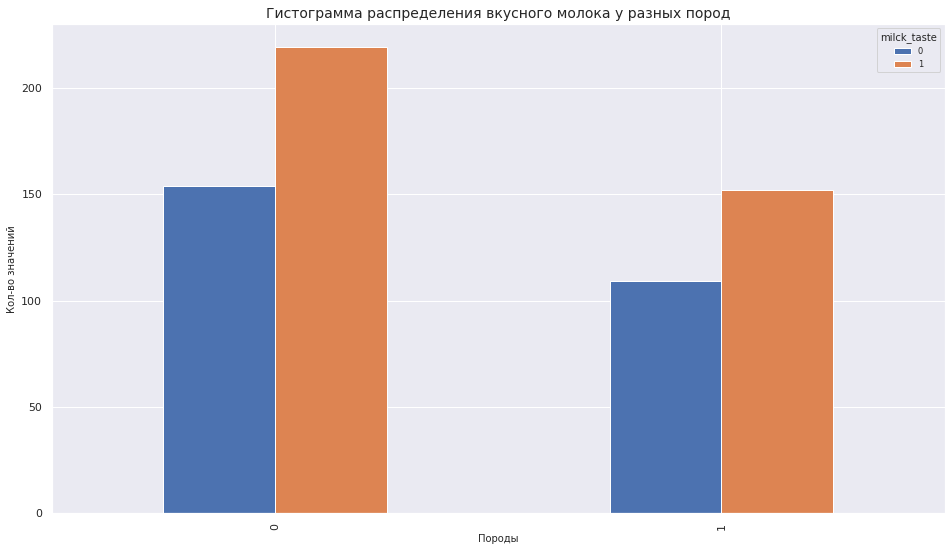

In [103]:
plot_un = fm.pivot_table(index = 'breed', values = 'profit', columns = 'milck_taste',aggfunc='count').plot.bar()
plot_un.set_title('Гистограмма распределения вкусного молока у разных пород',fontsize = 14)
plot_un.set_xlabel('Породы',fontsize = 10)
plot_un.set_ylabel('Кол-во значений',fontsize = 10)

По количеству положительных оценок порода Вис Бик Айдиал оказалась лучше.

### Влияние типа пастбища

Text(0, 0.5, 'Кол-во значений')

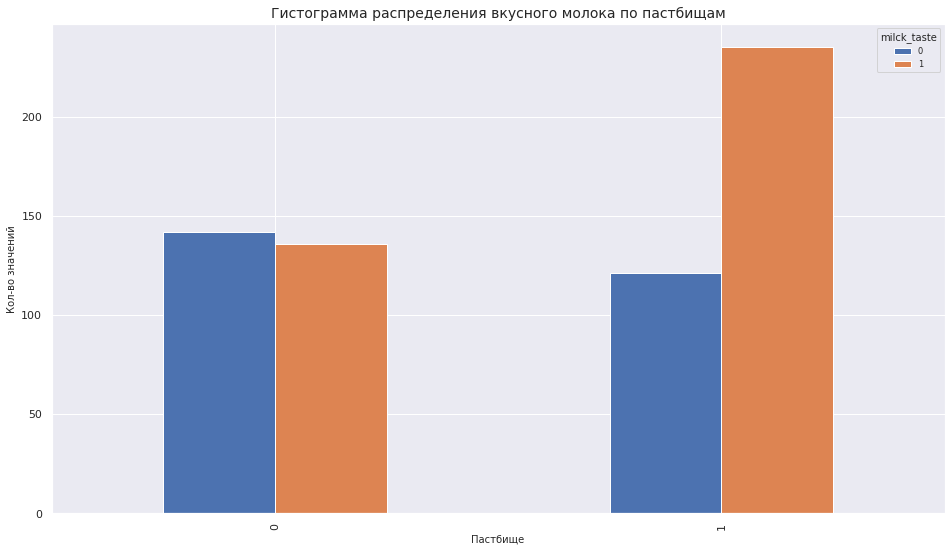

In [104]:
plot_un = fm.pivot_table(index = 'ar_type', values = 'profit', columns = 'milck_taste', aggfunc='count').plot.bar()
plot_un.set_title('Гистограмма распределения вкусного молока по пастбищам',fontsize = 14)
plot_un.set_xlabel('Пастбище',fontsize = 10)
plot_un.set_ylabel('Кол-во значений',fontsize = 10)

По графику видно, что коровы которые пасутся на холмистых лугах чаще дают вкусное молоко, чем коровы которые пасутся на равнинных. 

### Влияние возраста коровы на вкус молока

Text(0, 0.5, 'Кол-во значений')

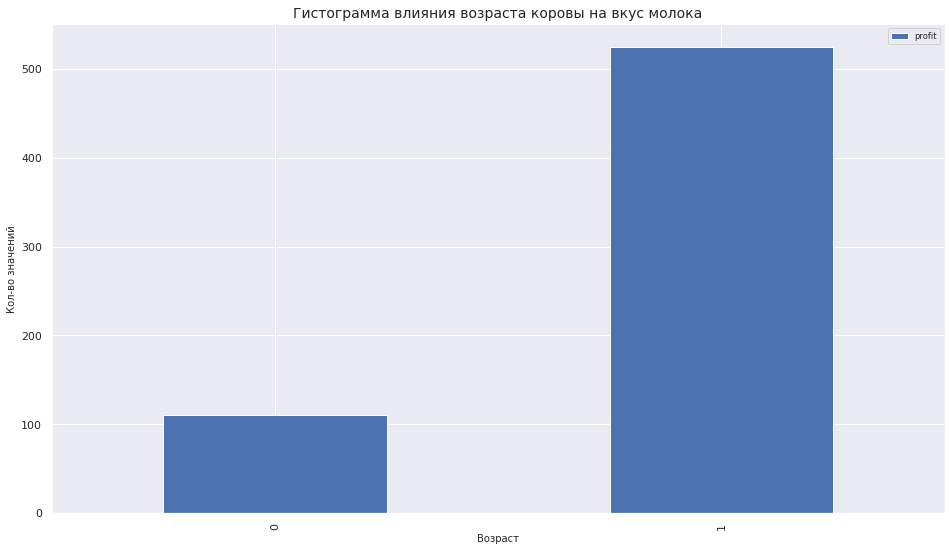

In [105]:
plot_un = fm.pivot_table(index = 'more_then_two_years', values = 'profit', aggfunc='count').plot.bar()
plot_un.set_title('Гистограмма влияния возраста коровы на вкус молока',fontsize = 14)
plot_un.set_xlabel('Возраст',fontsize = 10)
plot_un.set_ylabel('Кол-во значений',fontsize = 10)

По графику видно, что молоко у коров возрастом более 2-х лет молоко вкуснее, чем у коров младше.

### Влияние жирности на вкус молока

Text(0, 0.5, 'Кол-во вкусного молока')

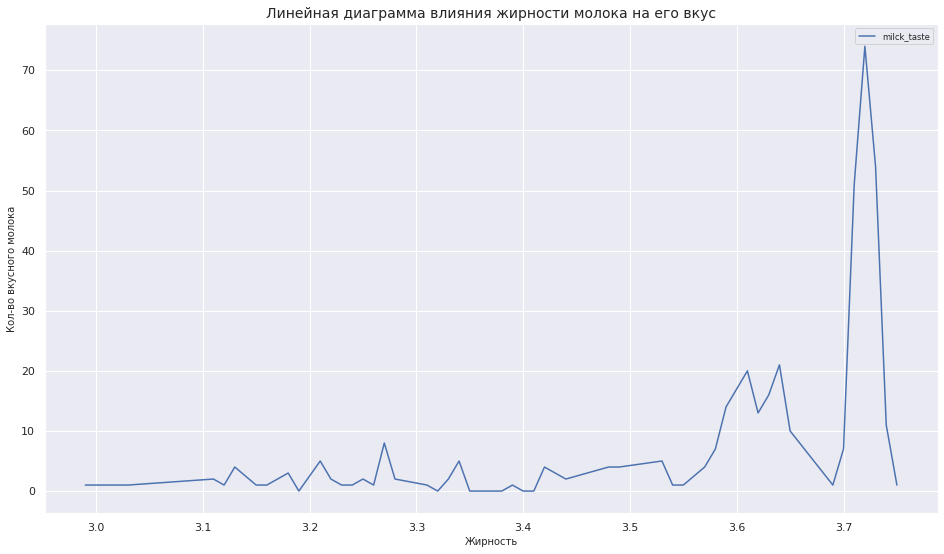

In [106]:
plot_un = fm.pivot_table(index = 'fatness', values = 'milck_taste', aggfunc='sum').plot.line()
plot_un.set_title('Линейная диаграмма влияния жирности молока на его вкус',fontsize = 14)
plot_un.set_xlabel('Жирность',fontsize = 10)
plot_un.set_ylabel('Кол-во вкусного молока',fontsize = 10)

По графику видно, что молоко с высокой жирностью чаще получает хорошие оценки от фермера.

<a id='8-topoc'></a>
### Выделение дополнительных классов данных

По проведенному исследовательскому анализу данных и корреляционному анализу стало очевидно, что некоторые непрерывные величины можно разделить на классы и соответствующим образом преобразовать. Показатель Жирность и СПО можно разделим на классы, а показатель ЭКЕ возведем в квадрат. Также разделим и показатели заводчика.

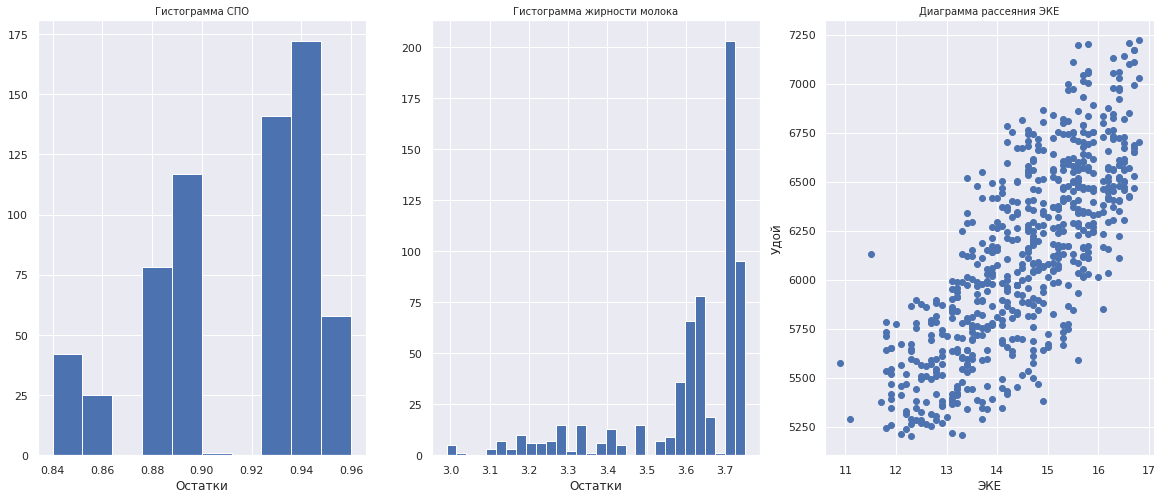

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
axes[0].hist(fm['feed_sh'])
axes[0].set_title('Гистограмма СПО')
axes[0].set_xlabel('Остатки')

axes[1].hist(fm['fatness'], bins = 30)
axes[1].set_title('Гистограмма жирности молока')
axes[1].set_xlabel('Остатки')

axes[2].scatter(fm['feed_en'], fm['profit'])
axes[2].set_xlabel('ЭКЕ')
axes[2].set_ylabel('Удой')
axes[2].set_title('Диаграмма рассеяния ЭКЕ')
plt.show()

СПО разделим на 3 класса: 1 - до 0.87, 2 - до 0.91, 3 - остальное. 

Жирность: 1 - до 3.5 (малая), 2 - до 3,67 (средняя), 3 - остальное.

In [108]:
cb['feed_sh'] = fm['feed_sh'].mean() + fm['feed_sh'].mean()*0.05
cb.loc[cb['feed_sh'] > 0.91, 'feed_sh'] = 1

In [109]:
fm.loc[fm['feed_sh'] > 0.91, 'feed_sh'] = 1
fm.loc[(fm['feed_sh'] <= 0.91) & (fm['feed_sh'] >= 0.87) & (fm['feed_sh'] != 1), 'feed_sh'] = 2
fm.loc[(fm['feed_sh'] < 0.87) & (fm['feed_sh'] != 1) & (fm['feed_sh'] != 2), 'feed_sh'] = 3
fm['feed_sh'] = fm['feed_sh'].astype('int64')


fm.loc[fm['fatness'] < 3.5, 'fatness'] = 1
fm.loc[(fm['fatness'] <= 3.67) & (fm['fatness'] >= 3.5), 'fatness'] = 2
fm.loc[fm['fatness'] > 3.67, 'fatness'] = 3
fm['fatness'] = fm['fatness'].astype('int64')


fm['feed_en'] = fm['feed_en'] * fm['feed_en'] 

In [110]:
cb.loc[cb['fatness'] < 3.5, 'fatness'] = 1
cb.loc[(cb['fatness'] <= 3.67) & (cb['fatness'] >= 3.5), 'fatness'] = 2
cb.loc[cb['fatness'] > 3.67, 'fatness'] = 3
cb['fatness'] = cb['fatness'].astype('int64')
cb['fatness'].unique()

array([2, 1, 3])

### Вывод

В результате проведенного корреляционного анализа удалось выяснить следующее:

По тепловой карте можно сделать вывод о том что между показателями "отношения сахара к протеину" и питательностью есть линейная взаимосвязь. Эта связь может в дальнейшем исказить работу модели, поэтому питательность возвели в квадрат. Также показатели СПО и ЭКЕ разделили на классы. Больше сильных линейных связей по показателям не обнаружено.

При подробном рассмотрении влияния вводных на целевые показатели было обнаружено:

- По количеству положительных оценок порода Вис Бик Айдиал оказалась лучше.
- Мультиколлинеарности скорее нет (нет узкого облака). 
- В группах "порода_папы_быка" разный уровень корреляции по всем факторам. Скорее всего, "папа" сильнее влияет на удой, чем остальные факторы.
- Коровы которые пасутся на холмистых лугах чаще дают вкусное молоко, чем коровы которые пасутся на равнинных.
- Молоко у коров возрастом более 2-х лет молоко вкуснее, чем у коров младше и удой у них меньше.
- Молоко с высокой жирностью чаще получает хорошие оценки от фермера.
- Видно, что СПО используется только для возрастных коров.

<a id='6-topoc'></a>
## Обучение модели линейной регрессии

### Построение первой модели

Ране при корреляционном анализе было выявлено что на удой оказывают влияние все показатели питания коров так как они имеют не только линейную взаимосвязь с целевым признаком но и логически сильно влияют на показатель. Также возьмем категориальные признаки породы и типа пастбища.

R2 LinearRegression = 0.8161061617255315


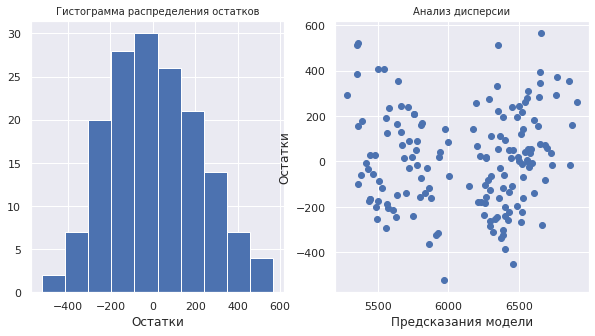

In [111]:
# сохранение выборок
fm_lr_1 = fm.drop(['id','milck_taste','fatness'], axis = 1)
X = fm_lr_1.drop('profit', axis=1)
y = fm_lr_1['profit']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'ar_type', 'dad_breed','feed_sh']
num_col_names = ['feed_en',
                 'feed_pr']


## подготовка признаков (масштабирование и кодирование)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
model_lr_1  = LinearRegression()
model_lr_1.fit(X_train, y_train)
predictions = model_lr_1.predict(X_test)

r2_1 = r2_score(y_test, predictions)  
mae_1 = mean_absolute_error(y_test, predictions)
mse_1 = mean_squared_error(y_test, predictions)
print("R2 LinearRegression =", r2_1)

# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

По первой модели можно сделать следующие выводы:

- Коэфициент детерминации R2 показывает, что в 82% случаев модель верно предсказывает удой коровы, которую собирается приобрести фермер
- По анализу дисперсии остатков начинает виднеться «рупор».Однозначно модель использовать нельзя - наблюдается гетероскедастичность (не постоянство дисперсии)
- Гистограма - "колокол". Но есть локальные всплески. Которые тоже говорят о том, что модель можно улучшать

### Построение второй модели

Попробуем добавить Жирность и Протеин, посмотрим как они повлияют на целевой показатель

R2 LinearRegression = 0.8361795466928612


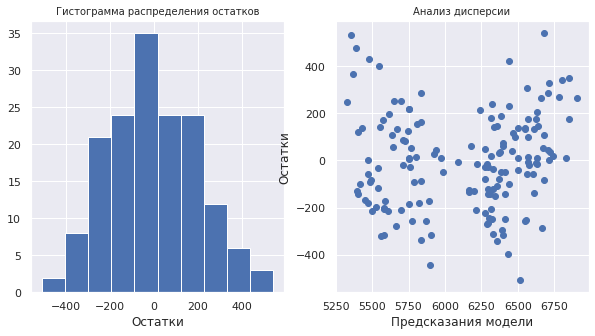

In [112]:
# сохранение выборок
fm_lr_2 = fm.drop(['id','milck_taste'], axis = 1)
X = fm_lr_2.drop('profit', axis=1)
y = fm_lr_2['profit']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'ar_type', 'dad_breed','feed_sh','fatness']
num_col_names = ['feed_en',
                 'feed_pr',
                 'protein']

## подготовка признаков (масштабирование и кодирование)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions = model_lr_2.predict(X_test)

r2_2 = r2_score(y_test, predictions)  
mae_2 = mean_absolute_error(y_test, predictions)
mse_2 = mean_squared_error(y_test, predictions)
print("R2 LinearRegression =", r2_2)

# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

- Коэфициент детерминации R2 вырос до 83.6%. 
- По анализу дисперсии остатков все еще виднеется «рупор» это означает, что предсказания модели еще не оптимальны.
- Анализ остатков модели: дисперсия разброса ошибки стала чуть стабильнее на всём дипазане фактичнеских данных. Это явное улучшение. И это важно. Наблюдаются две зоны ошибок. Но разница дисперсии ошибок не систематическая, а выборочная.
- Гистограма: среднее и медиана совпадают, но распределение не нормальное (бимодальности, плюс смещение среднего влево от нуля). Значит потенциал для улучшения модели всё ещё есть.

### Построение третьей модели

Добавим в вводные еще один признак "Имя папы" из датасета №2.

In [113]:
print(fm.shape,fd.shape)
fm_lr_33 = fm.merge(fd)
print(fm_lr_33.shape)

(634, 12) (629, 2)
(634, 13)


R2 LinearRegression = 0.8546391262865196


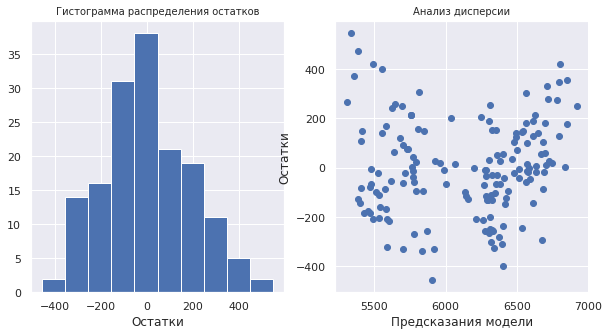

In [114]:
# сохранение выборок
fm_lr_33 = fm_lr_33.drop(['id','milck_taste'], axis = 1)
X = fm_lr_33.drop('profit', axis=1)
y = fm_lr_33['profit']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'ar_type', 'dad_breed','feed_sh','fatness','dad_name']
num_col_names = ['feed_en',
                 'feed_pr',
                 'protein']

## подготовка признаков (масштабирование и кодирование)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# обучение модели и получение предсказаний на тестовых данных
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions = model_lr_3.predict(X_test)

r2_3 = r2_score(y_test, predictions)  
mae_3 = mean_absolute_error(y_test, predictions)
mse_3 = mean_squared_error(y_test, predictions)
print("R2 LinearRegression =", r2_3)

# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

- Коэфициент детерминации R2 вырос почти до 85,5%. 
- По анализу дисперсии остатков виднеется «рупор».
- Гистограма: среднее и медиана совпадают, не смещены относительно 0. Но бимодальность присутствует.

### Оценка качества моделей по метрикам

Сравним показатели три модели по метрикам оценки качества.

In [115]:
print('Показатели 1-ой модели: r2 = ', r2_1, 'mse = ', mse_1, 'mae = ', mae_1)
print('Показатели 2-ой модели: r2 = ', r2_2, 'mse = ', mse_2, 'mae = ', mae_2)
print('Показатели 3-ей модели: r2 = ', r2_3, 'mse = ', mse_3, 'mae = ', mae_3)

Показатели 1-ой модели: r2 =  0.8161061617255315 mse =  45766.49685534591 mae =  173.26415094339623
Показатели 2-ой модели: r2 =  0.8361795466928612 mse =  40770.74213836478 mae =  161.38364779874215
Показатели 3-ей модели: r2 =  0.8546391262865196 mse =  36063.15094339623 mae =  150.1823899371069


У третьей модели самый высокий процент правильных ответов - почти 85,5%, самая маленькая абсолютная ошибка и самая маленькая квадратичная ошибка. Также по анализу гистограммы распределения и дисперсии остатков у модели были лучшие показатели. Примем эту модель для прогнозирования удоя.

1.959963984540054
0.7998537464657438 0.9094245061072954


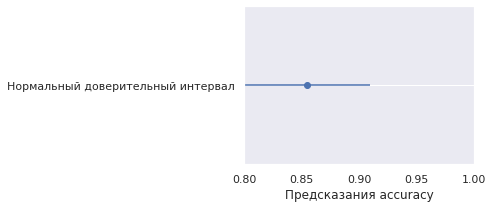

In [116]:
confidence = 0.95 
z_value = st.norm.ppf((1 + confidence) / 2.0)
print(z_value)


acc_test = model_lr_3.score(X_test, y_test)
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(ci_lower, ci_upper)


fig, ax = plt.subplots(figsize=(7, 3))

ax.errorbar(acc_test, 0, xerr=ci_length, fmt="o")

ax.set_xlim([0.8, 1.0])

ax.set_yticks(np.arange(1))
ax.set_yticklabels(["Нормальный доверительный интервал"])
ax.set_xlabel("Предсказания accuracy")

plt.tight_layout()
plt.grid(axis="x")
plt.show()

### Прогноз удоя у коров продавца на основе обученной модели

Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение)

In [117]:
cb['feed_en'] = fm['feed_en'].mean() +  fm['feed_en'].mean()*0.05
cb['feed_pr'] = fm['feed_pr'].mean() + fm['feed_pr'].mean()*0.05
cb.head()

,breed,ar_type,dad_breed,dad_name,fatness,protein,more_then_two_years,feed_sh,feed_en,feed_pr
0,0,1,Айдиал,Геркулес,2,3.076,1,1.0,223.841236,2018.817114
1,0,0,Соверин,Буйный,2,3.081,0,1.0,223.841236,2018.817114
2,1,0,Соверин,Барин,2,3.074,1,1.0,223.841236,2018.817114
3,1,1,Айдиал,Буйный,1,3.061,1,1.0,223.841236,2018.817114
4,1,0,Айдиал,Буйный,2,3.074,1,1.0,223.841236,2018.817114


In [118]:
## подготовка признаков (масштабирование и кодирование)

cb_ohe = encoder.transform(cb[cat_col_names])
encoder_col_names = encoder.get_feature_names()


cb_scaled = scaler.transform(cb[num_col_names])
cb_ohe = pd.DataFrame(cb_ohe, columns=encoder_col_names)
cb_scaled = pd.DataFrame(cb_scaled, columns=num_col_names)
cb_new = pd.concat([cb_ohe, cb_scaled], axis=1)

In [119]:
# предсказание модели
predictions_final = model_lr_3.predict(cb_new)
predictions_final = pd.Series(predictions_final).sort_values(ascending = False)
predictions_final

12    6836.0
17    6692.0
11    6541.0
3     6538.0
15    6508.0
5     6502.0
10    6492.0
0     6421.0
6     6421.0
9     6402.0
4     6390.0
19    6390.0
18    6319.0
16    6311.0
7     6278.0
1     6263.0
13    6098.0
8     6088.0
14    6088.0
2     6088.0
dtype: float64

### Вывод

Изходя из пдредсказанных моделью значений все коровки заводчика с вероятностью в 85,5% будут давать больше 6000 килограммов молока в год.

<a id='7-topoc'></a>
## Обучение модели логистической регрессии

In [120]:
fm_lgr = fm.drop(['id','profit'], axis = 1)
X = fm_lgr.drop(columns='milck_taste')
y = fm_lgr['milck_taste']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'ar_type', 'dad_breed']
num_col_names = ['feed_en',
                 'feed_pr',
                 'feed_sh',
                 'fatness',
                 'protein']

## подготовка признаков (масштабирование и кодирование)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# создаём объект для работы с моделью
clf = LogisticRegression()

# настраиваем модель на данные
clf = clf.fit(X_train, y_train)

# получаем прогнозные значения
y_pred = clf.predict(X_test) 


recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
acc = accuracy_score(y_test, y_pred)

print('accuracy: ',round(acc,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))


accuracy:  0.61
recall:  0.771
precision:  0.649


Text(0.5, 57.5, 'Predicted')

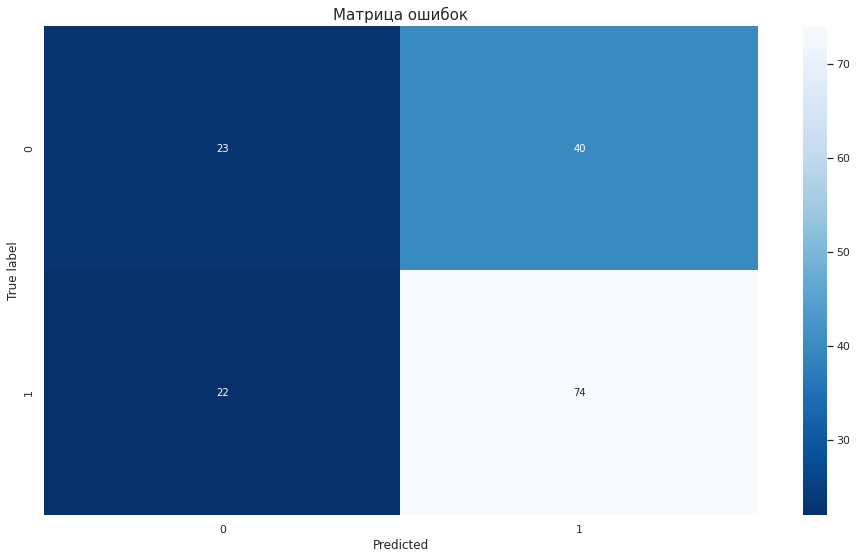

In [121]:
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted')

По матрице ошибок можно сделать вывод о том, что модель чаще совершает ошибку первого рода и ложно прогнозирует что молоко будет вкусным. По метрикам оценки модели можно сказать, что общая точность предсказаний у данной модели 61%. В 67% случаев модель верно прогнозирует вкусное молоко. В 72% случаев модель верно прогнозирует невкусное молоко. Но для нас важнее исключить  ошибки первого рода. Для колибровки модели надо понять на каком пороге модель будет давать более точные результаты. Построим расчетные столбцы с предсказаниями для разных порогов.

In [122]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)


thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 4,endpoint=False)] 

columns = []

for i in thresholds:
        columns.append('y_pred_'+str(i))
        data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

display(data)

/tmp/ipykernel_31/495331918.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,y_valid,y_proba,y_pred_0.1,y_pred_0.32,y_pred_0.55,y_pred_0.78
86,1,0.859871,1,1,1,1
57,1,0.838773,1,1,1,1
148,1,0.817650,1,1,1,1
121,1,0.812037,1,1,1,1
146,1,0.808769,1,1,1,1
80,1,0.801181,1,1,1,1
12,1,0.791627,1,1,1,1
75,1,0.787072,1,1,1,1
25,1,0.786914,1,1,1,1
119,1,0.779433,1,1,1,0


По оценкам вероятностей отнесения к классу можно видеть, что среди данных с низкой вероятностью отнесения к классу 1 очень много значений этого класса. Сместим порог классификации до 0,65

In [123]:
X = fm_lgr.drop(columns='milck_taste')
y = fm_lgr['milck_taste']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'ar_type', 'dad_breed']
num_col_names = ['feed_en',
                 'feed_pr',
                 'feed_sh',
                 'fatness',
                 'protein']

## подготовка признаков (масштабирование и кодирование)

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


clf_2 = LogisticRegression()
clf_2.fit(X_train, y_train)
THRESHOLD = 0.79
preds = np.where(clf_2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)


recall = recall_score(y_test,preds)
precision = precision_score(y_test,preds)
acc = accuracy_score(y_test, preds)

print('accuracy: ',round(acc,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.44
recall:  0.073
precision:  1.0


Text(0.5, 57.5, 'Predicted')

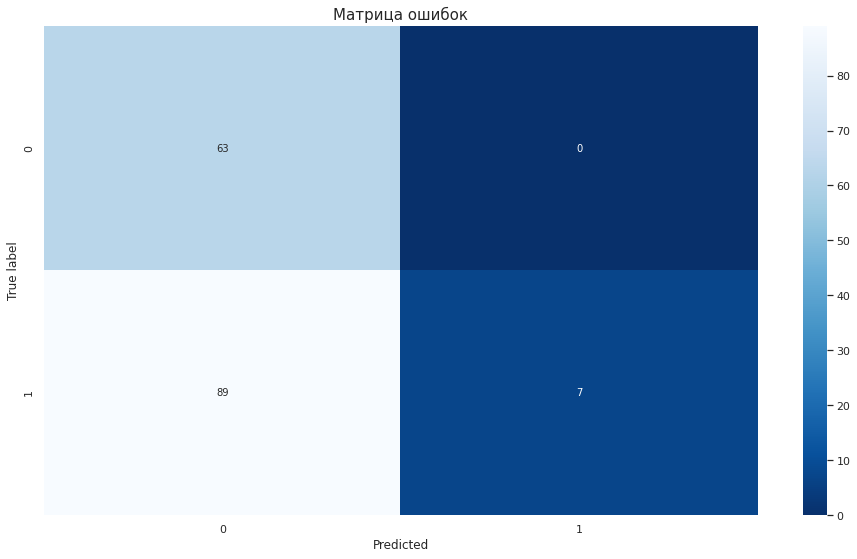

In [124]:
cm = confusion_matrix(y_test, preds)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted')

Общее качество модели снизилось, но фермер сказал что молоко обязательно должно быть вкусным. Теперь модель никогда ложно не классифицирует не вкусное молоко как вкусное. Вероятность корректной классификации вкусного молока теперь 100%. Предскажем показатели по обученой модели.

In [126]:
## подготовка признаков (масштабирование и кодирование)


cb_ohe = encoder.transform(cb[cat_col_names])


encoder_col_names = encoder.get_feature_names()


cb_scaled = scaler.transform(cb[num_col_names])
cb_ohe = pd.DataFrame(cb_ohe, columns=encoder_col_names)
cb_scaled = pd.DataFrame(cb_scaled, columns=num_col_names)
cb_new = pd.concat([cb_ohe, cb_scaled], axis=1)


In [127]:
# предсказание модели
predictions_final = clf_2.predict(cb_new)
predictions_final = pd.Series(predictions_final).sort_values(ascending = False)
predictions_final

0     1
14    1
2     1
3     1
18    1
6     1
7     1
8     1
9     1
1     1
16    1
15    1
13    1
17    0
10    0
12    0
11    0
5     0
4     0
19    0
dtype: int64

### Вывод

С вероятностью 100% коровы - 0,1,2,3,6,7,8,9,13,14,15,16,18, которых хочет продать заводчик дадут вкусное молоко.

<a id='8-topoc'></a>
## Итоговые выводы

Для проведения исследования предоставлены три датасета.

**1) В ходе превичного изучения данных было выявлено:**

- В первом ( поголовье фермера ) 634 строки и 12 столбцов, наблюдаются проблемы с типами данных, пропусков не обнаружено.
- Во втором ( доп. инф. к первому) 629 строк и 2 колонки, первичных проблем с данными не обнаружено
- В третьем ( поголовье не покупку ) 20 строк 7 столбцов, наблюдаются проблемы с типами данных, пропусков не обнаружено.

Для покупки у нас есть всего 20 коров на выбор ( если нет дубликатов, это будет рассмотрено ниже )

---

**2) В процессе предобработки данных были произведены следующие действия:**

Были заменены названия столбцов, для удобства дальнейшего исследования данных. Пропусков обнаружено небыло. Были преобразованы типы данных в 1-ом и 3-ем датасетах. Также было обнаружено пять дубликатов в 1-ом датасете и один дубликат в 3-ем, дубликаты были удалены, индексы и исходные датасеты перезаписаны чтобы обеспечить достоверность вводных дальнейшему проекту. При анилизе выбросов в 1-ом датасете были обнаружены анамалии в показателях "Удой", "Белок" и "Жирность". В первых двух - значения были заменены медианами, так как объем выбросов относительно мал. В "Жирности" аномалии занимают почти 14% от всех данных и не выходят за пределы разумного, было принято решение оставить их. Также были обнаружены и исправлены неявные дубликаты категориальных признаков.

---

**3) В результате проведенного исследовательского анализа данных удалось высяснить следующее:**

- Явная бимодальность в данных. Т.е. надо углублять в анализы подгрупп, прежде чем делать какие-то выводы.
- По распределению показателя "Удой" можно видеть, что медианным значением является 6133 кл. Перед проектом стоит задача определить коров, которые дают более 6000 кг молока и изходя из значений выше - задача реальная.
- По распределению показателя "Жирность молока" можно видеть, что медианным значением является 3.65%. Распределение имеет длинный хвост в сторону малых значений, но ранее было принято решеение не рассматривать эти значения как выбросы и оценить их влияние на другие показатели.
- По распределению показателя "Процент белка в молоке" можно видеть, что медианным значением является 3.076. Распределение близится к нормальному.
- По категориальным показателям представлено только две опции, это достаточно удобно для анализа. Далее в корреляционном анализе оценим влияние этих категорий на другие показатели.

---

**4) В результате проведенного корреляционного анализа удалось выяснить следующее:**

По тепловой карте можно сделать вывод о том что между показателями "отношения сахара к протеину" и питательностью есть линейная взаимосвязь. Эта связь может в дальнейшем исказить работу модели, поэтому питательность возвели в квадрат. Также показатели СПО и ЭКЕ разделили на классы. Больше сильных линейных связей по показателям не обнаружено.

При подробном рассмотрении влияния вводных на целевые показатели было обнаружено:

- По количеству положительных оценок порода Вис Бик Айдиал оказалась лучше.
- Мультиколлинеарности скорее нет (нет узкого облака). 
- В группах "порода_папы_быка" разный уровень корреляции по всем факторам. Скорее всего, "папа" сильнее влияет на удой, чем остальные факторы.
- Коровы которые пасутся на холмистых лугах чаще дают вкусное молоко, чем коровы которые пасутся на равнинных.
- Молоко у коров возрастом более 2-х лет молоко вкуснее, чем у коров младше и удой у них меньше.
- Молоко с высокой жирностью чаще получает хорошие оценки от фермера.
- Видно, что СПО используется только для возрастных коров.

---

**5) В результате построения моделей машинного обучения было произведено:**

- Было построено 3 модели линейной регрессии для предсказания удоя коров которые представил заводчик.
- Корректность предсказаний лучшей модели 85,5%, т.е. почти в 86-х процентах случаев модель верно предсказывает удой коровы.
- При помощи модели было выявлено что с вероятностью 85,5% все коровы представленные заводчиком дадут ожидаемый удой.

- Было построено 2 модели логистической регрессии для предсказания понравится ли вкус молока фермеру.
- Модель была откалибрована в пользу исключения ошибки первого характера, т.е. чтобы модель не предсказывала вкусное молоко ошибочно, так как этот показатель для заказчика принципиально важный.
- Точность определения вкусного молока у модели составляет 100%
- При помощи модели было выявлено что с вероятностью 100%  коровы (0,1,2,3,6,7,8,9,13,14,15,16,18) представленные заводчиком дадут вкусное молоко.
